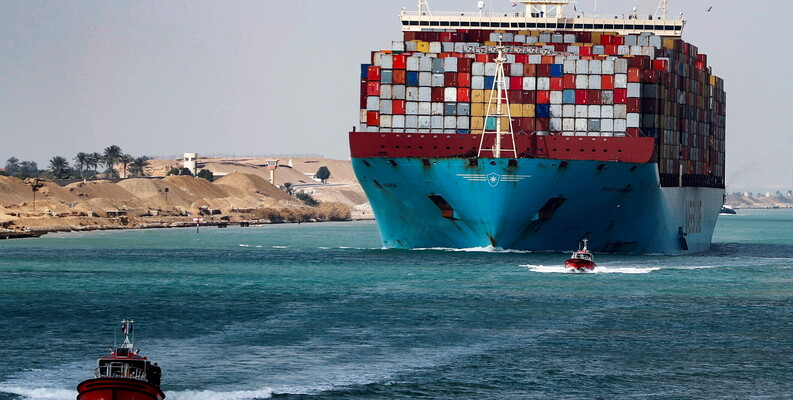

# Abstract: Análisis de la actividad portuaria global y el comerio marítimo

El comercio marítimo es un pilar esencial en la economía global, representando más del 80% del volumen de comercio mundial. Este estudio utiliza el conjunto de datos Global Daily Port Activity and Trade Estimates (obtenido de Kaggle), el cual proporciona información detallada sobre la actividad portuaria en múltiples países. Entre las variables incluidas se encuentran la cantidad y los tipos de barcos que arriban a cada puerto (portcalls), así como el volumen de carga movida en las importaciones y exportaciones.

# Objetivo

Identificar patrones relevantes en la actividad portuaria que permitan obtener una visión más clara sobre la eficiencia operativa y la importancia estratégica de los principales puertos y países en el comercio internacional. Poder analizar la evolución de las importaciones y exportaciones en países claves del comercio mundial en los últimos años, así como cuáles son los países con mayor tráfico portuario y volumen de carga movilizada.

# Hipótesis

El volumen comercial marítimo está determinado en gran medida por la cantidad de portcalls, el tipo de carga y el país donde se encuentra el puerto. Utilizando dichas variables, es posible construir un modelo de regresión que pueda predecir con cierta precisión el volumen comercial del puerto.

# Contexto comercial

Los puertos cumplen un rol fundamental como nodos logísticos clave en las cadenas de suministro. Su eficiencia operativa impacta directamente en los costos de transporte, tiempos de entrega y competitividad comercial, tanto a nivel nacional como internacional. Una mayor eficiencia portuaria se traduce en un aumento del flujo comercial, menores costos logísticos y un estímulo al crecimiento del país.

 # Desarrollo

# 1. Importar librerías

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Carga del Dataset

Repositorio de Github: https://github.com/AlejoUriel/CursoDataScience.git

Dataset en kaggle: https://www.kaggle.com/datasets/arunvithyasegar/daily-port-activity-data-and-trade-estimates/data

In [2]:
url = "https://media.githubusercontent.com/media/AlejoUriel/CursoDataScience/refs/heads/main/Daily_Port_Activity_Data_and_Trade_Estimates.csv"

df = pd.read_csv(url)
df.head()

,date,year,month,day,portid,portname,country,ISO3,portcalls_container,portcalls_dry_bulk,...,import_cargo,import,export_container,export_dry_bulk,export_general_cargo,export_roro,export_tanker,export_cargo,export,ObjectId
0,2019/01/01 00:00:00+00,2019,1,1,port0,Abbot Point,Australia,AUS,0,2,...,25648.932871,25648.932871,0.0,69693.624446,0.0,0.0,0.0,69693.624446,69693.624446,1
1,2019/01/02 00:00:00+00,2019,1,2,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,59426.741882,0.0,0.0,0.0,59426.741882,59426.741882,2
2,2019/01/03 00:00:00+00,2019,1,3,port0,Abbot Point,Australia,AUS,0,1,...,691.808826,691.808826,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,3
3,2019/01/04 00:00:00+00,2019,1,4,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,35660.208032,0.0,0.0,0.0,35660.208032,35660.208032,4
4,2019/01/05 00:00:00+00,2019,1,5,port0,Abbot Point,Australia,AUS,0,1,...,0.000000,0.000000,0.0,19127.574067,0.0,0.0,0.0,19127.574067,19127.574067,5


# Analisis exploratorio de Datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3486153 entries, 0 to 3486152
Data columns (total 30 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   date                     object 
 1   year                     int64  
 2   month                    int64  
 3   day                      int64  
 4   portid                   object 
 5   portname                 object 
 6   country                  object 
 7   ISO3                     object 
 8   portcalls_container      int64  
 9   portcalls_dry_bulk       int64  
 10  portcalls_general_cargo  int64  
 11  portcalls_roro           int64  
 12  portcalls_tanker         int64  
 13  portcalls_cargo          int64  
 14  portcalls                int64  
 15  import_container         float64
 16  import_dry_bulk          float64
 17  import_general_cargo     float64
 18  import_roro              float64
 19  import_tanker            float64
 20  import_cargo             float64
 21  import  

In [ ]:
df.shape

(3486153, 30)

In [ ]:
df.isnull().sum()

,0
date,0
year,0
month,0
day,0
portid,0
portname,0
country,0
ISO3,0
portcalls_container,0
portcalls_dry_bulk,0


Se observa que el dataset no tiene datos faltantes.

In [ ]:
df["year"].value_counts()

,count
year,
2020,599874
2019,598235
2021,598235
2022,598235
2023,598235
2024,493339


In [ ]:
df["country"].value_counts()

,count
country,
Japan,229716
United States,225462
China,170160
Indonesia,159525
United Kingdom,140382
...,...
Guadeloupe,2127
Saint Martin,2127
Réunion,2127


In [ ]:
# A fin de entender como se componen las columnas sobre portcalls, import y export
df_china = df[df["country"] == "China"]

df_china.iloc[:, 8:15]

,portcalls_container,portcalls_dry_bulk,portcalls_general_cargo,portcalls_roro,portcalls_tanker,portcalls_cargo,portcalls
168000,21,4,0,1,4,26,30
168001,19,4,5,0,3,28,31
168002,21,5,3,0,2,29,31
168003,12,2,0,1,1,15,16
168004,18,4,2,0,2,24,26
...,...,...,...,...,...,...,...
3262979,0,0,0,0,0,0,0
3262983,0,0,0,0,0,0,0
3262986,0,0,1,0,0,1,1
3262991,0,0,0,0,0,0,0


In [ ]:
df_china.iloc[:, 15:22]

,import_container,import_dry_bulk,import_general_cargo,import_roro,import_tanker,import_cargo,import
168000,62078.376315,140218.582389,0.000000,0.0,212723.042573,202296.958703,415020.001276
168001,35194.173284,207576.905323,22290.670916,0.0,14517.239903,265061.749523,279578.989426
168002,36750.210771,235199.176340,11689.512926,0.0,30970.320728,283638.900037,314609.220765
168003,16400.735984,42226.097387,0.000000,0.0,0.000000,58626.833372,58626.833372
168004,47806.871368,181988.461379,19803.117947,0.0,17174.672558,249598.450694,266773.123252
...,...,...,...,...,...,...,...
3262979,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3262983,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3262986,0.000000,0.000000,4832.714973,0.0,0.000000,4832.714973,4832.714973
3262991,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


Las variables de portcalls, import y export se encuentran clasificadas según en el tipo de buque y la carga transportada:
- container: Containers.
- dry_bulk: Carga a granel.
- general_cargo: Carga en general.
- roro: Vehiculos y otros rodados.
- tanker: Carga líquida.

Por otro lado, las dos columnas restantes, total_cargo y total, representan el total entre las anteriores.

## Aclaración

Como se está trabajando con toneladas, el siguiente análisis compara el volumen físico de comercio marítimo (en toneladas) entre los países seleccionados. Es decir, que refleja la intensidad y naturaleza de sus comercios físicos, aunque no necesariamente sus valores económicos.

## Gráfico de lineas: Evolución de las importaciones entre 2020 y 2023

<ipython-input-10-e36710ffc34f>:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_mensual_imp = df_filtrado.groupby([df_filtrado["date"].dt.to_period("M"), "country"])["import"].sum().reset_index()


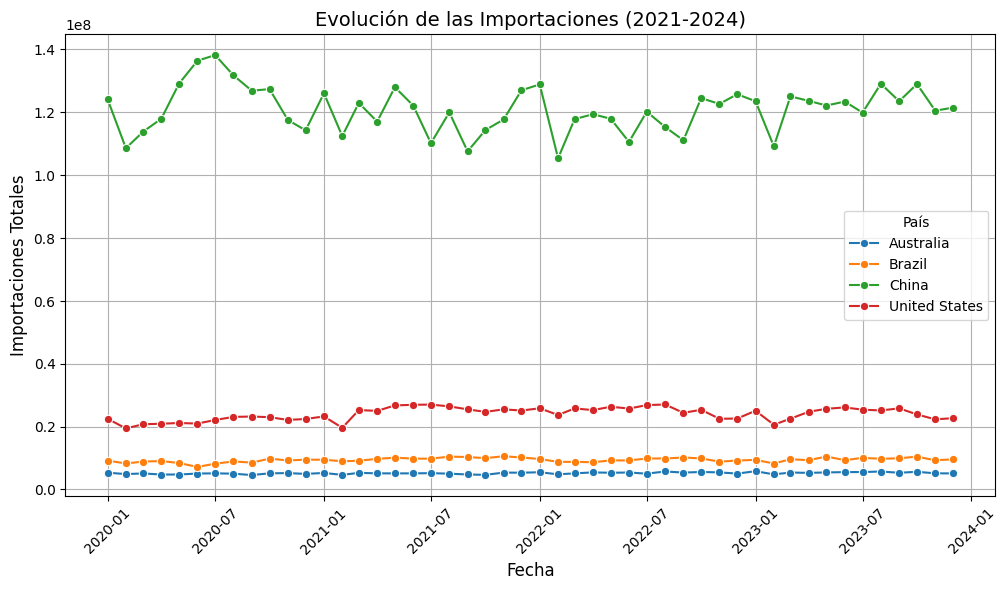

In [ ]:
paises_seleccionados = ["China", "Australia", "United States", "Brazil"]

# Filtra el dataset con los paises seleccionados y el año entre 2020 y 2023
df_filtrado = df[(df["country"].isin(paises_seleccionados)) & (df["year"] >= 2020) & (df["year"] <= 2023)].copy()

# Convierte la columna de fecha en formato datetime
df_filtrado["date"] = pd.to_datetime(df_filtrado["date"])

# IMPORTACIONES
# Agrupa por mes y país, sumando las importaciones
df_mensual_imp = df_filtrado.groupby([df_filtrado["date"].dt.to_period("M"), "country"])["import"].sum().reset_index()

# Convierte la columna de fecha a formato datetime para graficar
df_mensual_imp["date"] = df_mensual_imp["date"].astype(str)
df_mensual_imp["date"] = pd.to_datetime(df_mensual_imp["date"])

# Linea de Tiempo importaciones
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_mensual_imp, x="date", y="import", hue="country", marker="o", palette="tab10")

plt.title("Evolución de las Importaciones (2021-2024)", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Importaciones Totales", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="País")
plt.grid(True)
plt.show()

Se puede observar que China es por amplia diferencia el mayor importador, esto refleja el papel crucial de China en el comercio internacional como uno de los mayores centros de importación y consumo global.

Por otro lado, se observa que Estados Unidos ocupa la segunda posición con un volumen estable de importaciones.

En cuanto a Australia y Brasil, ambos países presentan valores de importación más bajo. De estos, Australia se posiciona como el menor importador de los cuatro países.


## Gráfico de lineas: Evolución de las exportaciones entre 2020 y 2023

<ipython-input-11-e765f590db0c>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_mensual_exp = df_filtrado.groupby([df_filtrado["date"].dt.to_period("M"), "country"])["export"].sum().reset_index()


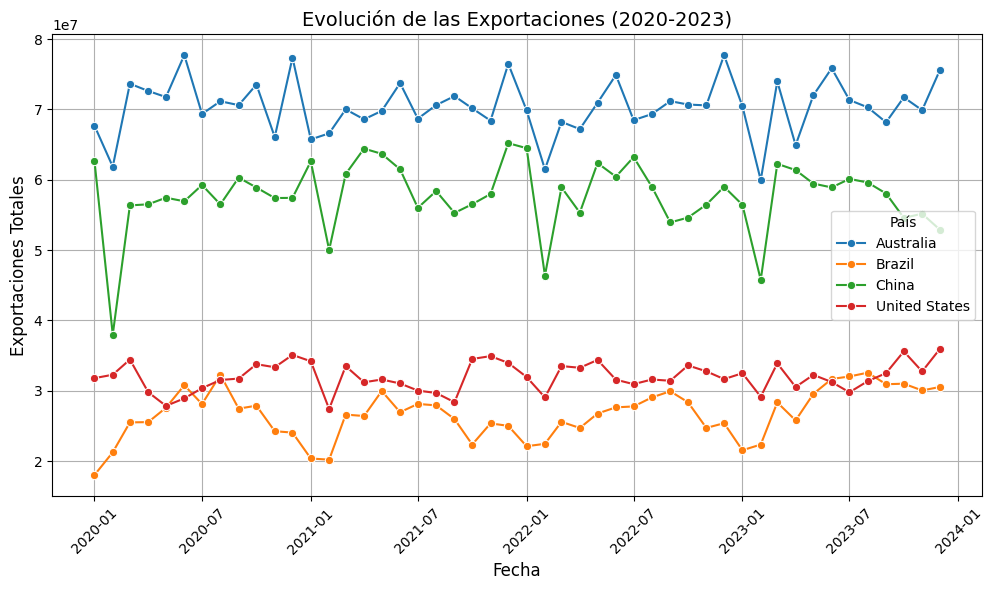

In [ ]:
# Agrupa por mes y país, sumando las exportaciones
df_mensual_exp = df_filtrado.groupby([df_filtrado["date"].dt.to_period("M"), "country"])["export"].sum().reset_index()

# Convierte la columna de fecha a formato datetime para graficar
df_mensual_exp["date"] = df_mensual_exp["date"].astype(str)
df_mensual_exp["date"] = pd.to_datetime(df_mensual_exp["date"])

# Linea de timepo exportaciones
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_mensual_exp, x="date", y="export", hue="country", marker="o", palette="tab10")

plt.title("Evolución de las Exportaciones (2020-2023)", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Exportaciones Totales", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="País", loc="right")
plt.grid(True)
plt.show()

Se puede observar que Australia y China lideran las exportaciones; a diferencia de las importaciones, se presenta una tendencia más volátil, especialmente observable en los picos y caídas en los meses de diciembre, enero y febrero. Esta variabilidad podría estar asociada a los ciclos estacionales y la demanda global de los productos que estos países exportan.

Un comportamiento similar, aunque en menor escala, es visible en las exportaciones de Estados Unidos y Brasil.

## Gráficos de barras: Top paises con más portcalls y trade volume

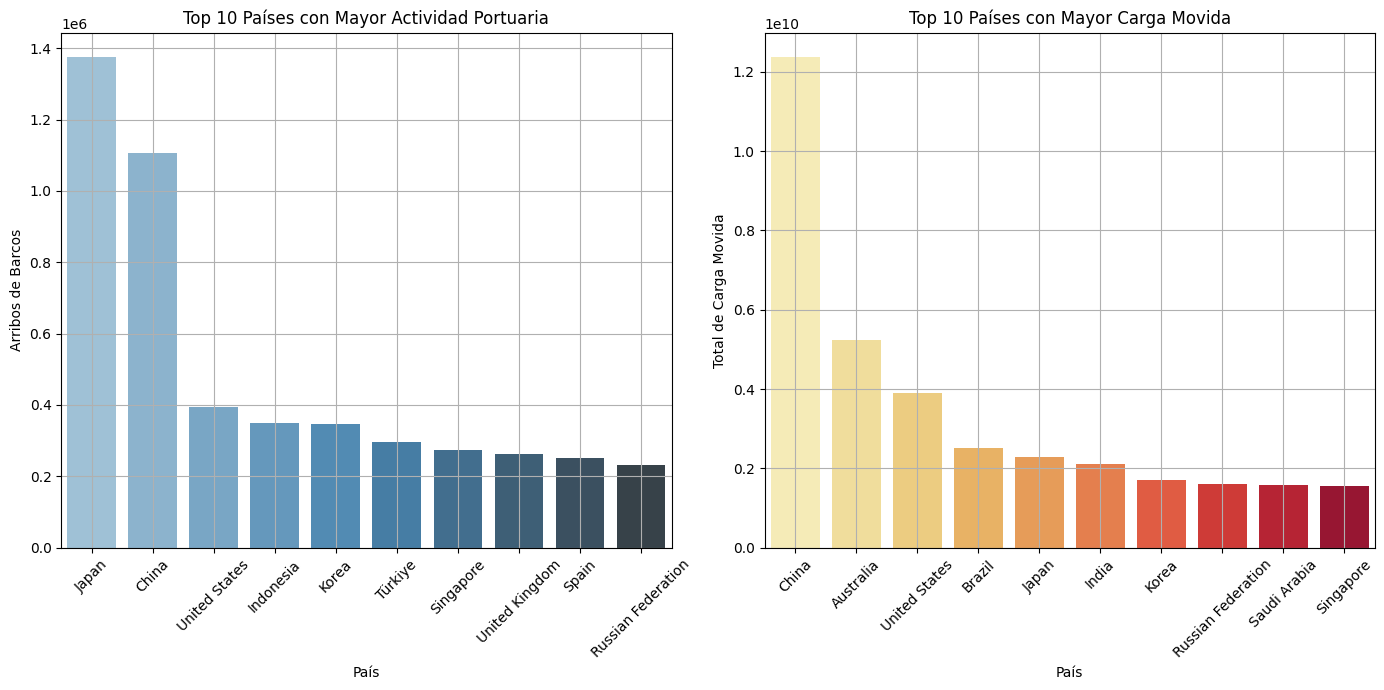

In [ ]:
# Agrupa por país y suma la cantidad total de arribos (portcalls)
df_actividad = df.groupby("country")["portcalls"].sum().reset_index()

# Se queda con los 10 países por mayor actividad portuaria
df_actividad = df_actividad.sort_values(by="portcalls", ascending=False).head(10)

# Crea nueva columna que sume importaciones y exportaciones (volumen total de carga)
df["trade_volume"] = df["import"] + df["export"]

# Agrupa por país y suma el total de carga movida
df_carga = df.groupby("country")["trade_volume"].sum().reset_index()

# Ordenar los países por mayor volumen de carga movida
df_carga = df_carga.sort_values(by="trade_volume", ascending=False).head(10)

# Gráfico de Barras para compara actividad portuaria (portcalls) y la carga movida (trade volume)
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=df_actividad["country"], y=df_actividad["portcalls"], hue=df_actividad["country"], legend=False, palette="Blues_d")
plt.xlabel("País")
plt.ylabel("Arribos de Barcos")
plt.title("Top 10 Países con Mayor Actividad Portuaria")
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.barplot(x=df_carga["country"], y=df_carga["trade_volume"], hue=df_carga["country"], legend=False, palette="YlOrRd")
plt.xlabel("País")
plt.ylabel("Total de Carga Movida")
plt.title("Top 10 Países con Mayor Carga Movida")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


Observaciones:
* Japón es el país con mayor tráfico portuario, pero curiosamente recién figura cuarto entre los países con mayor movimiento de carga. Esto sugiere que Japón tiene una alta frecuencia de barcos, pero con cargas relativamente pequeñas.
* Australia, en cambio, es el segundo país con mayor carga total movida, pero no aparece entre los 10 países con más tráfico portuario. Esto indica que Australia mueve grandes volúmenes de carga con un menor número de barcos, lo que podría reflejar una mayor eficiencia en sus operaciones portuarias.
* Brasil presenta un comportamiento similar al de Australia: es el cuarto país con más carga movida, pero no figura entre los de mayor tráfico.

## Scatterplots: Portcalls vs Trade Volume

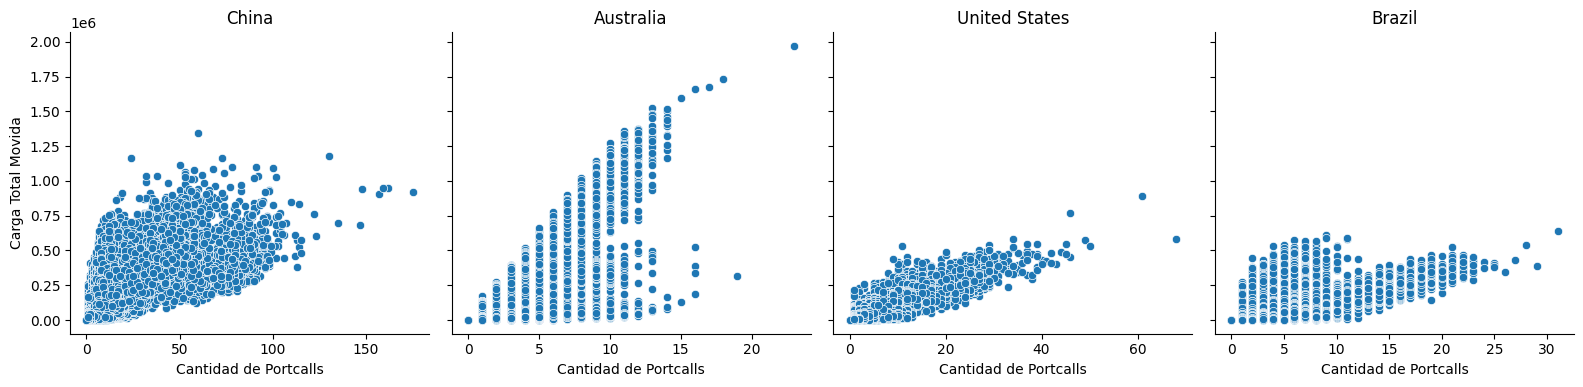

In [ ]:
# Lista de países en el orden deseado
orden_paises = ["China", "Australia", "United States", "Brazil"]

# Prepara los datos en nuevo df
df_scatter = df[df["country"].isin(orden_paises)].copy()

df_scatter["country"] = pd.Categorical(df_scatter["country"], categories=orden_paises, ordered=True)

df_scatter["trade_volume"] = df_scatter["import"] + df_scatter["export"]

g = sns.FacetGrid(df_scatter, col="country", col_order=orden_paises, col_wrap=4, height=4, sharex=False, sharey=True)

sns.set_theme(style="ticks")
g.map_dataframe(sns.scatterplot, x="portcalls", y="trade_volume")
g.set_xlabels("Cantidad de Portcalls")
g.set_ylabels("Carga Total Movida")
g.set_axis_labels("Cantidad de Portcalls", "Carga Total Movida")
g.set_titles(col_template="{col_name}")
plt.show()

Para interpretar la relación entre la cantidad de portcalls y la carga total movida en los países seleccionados, podemos dividir el análisis en dos comparaciones clave:

* China y Australia: Ambos países manejan volúmenes de carga total similares. Sin embargo, Australia registra significativamente menos portcalls que China, lo que sugiere que mueve grandes cantidades de carga con menos arribos de barcos. Esto podría indicar una mayor eficiencia en la gestión portuaria, ya sea porque recibe embarcaciones de mayor capacidad o porque optimiza mejor el movimiento de mercancías.

* Estados Unidos y Brasil: Aunque estos países manejan menores volúmenes de carga en comparación con China y Australia, presentan diferencias notables en su distribución. Brasil parece movilizar más carga con menos portcalls, lo que sugiere que recibe barcos más grandes o que su comercio marítimo está más concentrado en menos operaciones. En contraste, Estados Unidos muestra una distribución más dispersa, con un mayor número de portcalls para volúmenes de carga equivalentes. Esto sugiere que Estados Unidos recibe más tráfico marítimo, pero con barcos que, en promedio, movilizan menor cantidad de mercancía.

## Primeras conclusiones

Los patrones observados sugieren que no necesariamente una mayor cantidad de portcalls implica un mayor volumen de carga movilizada. La eficiencia del comercio marítimo varía según el país y puede depender de factores como el tamaño de los barcos, la infraestructura portuaria y la composición de las mercancías transportadas. Por lo que para la construcción de los modelos, si la idea es predecir el trade volume, será conveniente tener en cuenta cada tipo de portcall, y no solamente el total. También se observó cómo cada país tiene sus propias características, por lo que también será una variable clave al momento de predecir el trade volume.

# Preprocesamiento de datos

Debido a los limites computacionales de Google Colab, fue necesario reducir el tamaño del dataset.

In [3]:
# Filtra los paises con pocas portcalls para reducir el tamaño del dataset

portcalls_por_pais = df.groupby("country")["portcalls"].sum().sort_values()

paises_filtrados = portcalls_por_pais[portcalls_por_pais > 10000].index

df = df[df["country"].isin(paises_filtrados)]

In [4]:
df.shape

(3011832, 30)

In [5]:
df["country"].value_counts()

,count
country,
Japan,229716
United States,225462
China,170160
Indonesia,159525
United Kingdom,140382
...,...
Singapore,4254
Bulgaria,4254
Malta,4254


El tamaño del dataset se redujo considerablemente, dejando únicamente los 80 países con mas registros.

# Modelo de Linear Rregression

## Preparación de los datos

In [6]:
# Agrego la columna de trade volume
df["trade_volume"] = df["import"] + df["export"]

# Selecciono las columnas sobre las portcalls
features = [
    "country",
    "portcalls_container", "portcalls_dry_bulk", "portcalls_general_cargo", "portcalls_roro", "portcalls_tanker",
]

df_model = df[features + ["trade_volume"]]

In [7]:
# Convierte la columna country con One-Hot Encoding

df_model = pd.get_dummies(df_model, columns=["country"], drop_first=True)

In [8]:
# Separación de los datos de entrenamiento y prueba

x = df_model.drop("trade_volume", axis=1)
y = df_model["trade_volume"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo

In [9]:
modelo_lr = LinearRegression()
modelo_lr.fit(x_train, y_train)

LinearRegression()

## Evalución del rendimiento del modelo

In [10]:
y_pred = modelo_lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:}")
print(f"Coeficiente de determinación (R²): {r2:}")

Error cuadrático medio (MSE): 1335509936.176376
Coeficiente de determinación (R²): 0.6042293783071928


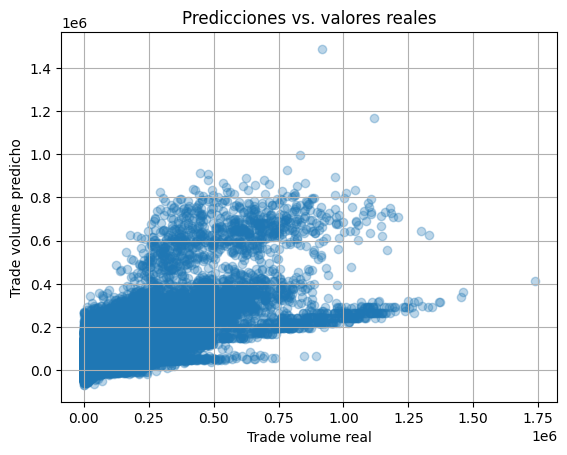

In [11]:
# Visualización de las predicciones frente a los valores reales

plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Trade volume real")
plt.ylabel("Trade volume predicho")
plt.title("Predicciones vs. valores reales")
plt.grid(True)
plt.show()

Se puede observar que los resultados del primer modelo de regresión lineal no fueron óptimos; el error cuadrático medio (MSE) fue de 1335509936, siendo que la escala de la variable objetivo está en millones de toneladas (1e6), indica una desviación significativa de las predicciones. Por otro lado, el coeficiente de determinación (R^2) fue de 0.06, lo cual sugiere que el modelo logró explicar el 60% de la varianza observada en los datos.

En cuanto al scatterplot, es notable la dispersión en torno a la recta diagonal, lo que refleja que el modelo no logra capturar adecuadamente la relación entre las variables explicativas y el volumen de comercio.

# Modelo de Random Forest Regressor

En busca de un mejor modelo que pueda predecir el trade volume y reafirmar la hipótesis inicial, decido probar con un modelo de Random Forest Regressor.

## Preparación de los datos

In [13]:
# Agrega columna de trade_volume
df["trade_volume"] = df["import"] + df["export"]

features = [
    "country",
    "portcalls_container", "portcalls_dry_bulk", "portcalls_general_cargo", "portcalls_roro", "portcalls_tanker"
]

df_encoded = df[features].copy()

# Aplica Label Encoding a la columna 'country'
le = LabelEncoder()
df_encoded["country"] = le.fit_transform(df_encoded["country"])

# Variable objetivo
target = df["trade_volume"]

In [14]:
# Separacion de datos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(df_encoded, target, test_size=0.2, random_state=42)

## Entrenamiento del modelo

In [20]:
rf_model = RandomForestRegressor(n_estimators=80, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=80, random_state=42)

## Evaluación del rendimiento del modelo

In [21]:
# Evaluación del modelo

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 624984868.55
Coeficiente de determinación (R²): 0.81


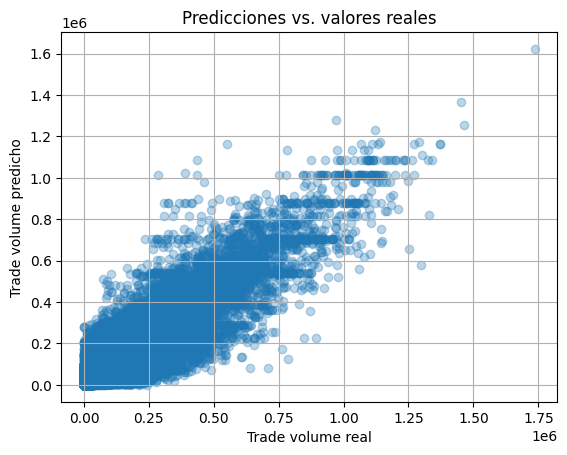

In [22]:
# Visualización de las predicciones frente a los valores reales

plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Trade volume real")
plt.ylabel("Trade volume predicho")
plt.title("Predicciones vs. valores reales")
plt.grid(True)
plt.show()

Los resultados con el modelo de Random Forest son notablemente mejores. El MSE disminuyó a 624984869 toneladas; considerando que el trade volume está en millones de toneladas, este error resulta aceptable. Por otro lado, el coeficiente de determinación (R^2) se incrementó a 0.81, indicando un modelo que explica el 81% de la variabilidad de los datos.
El gráfico de dispersión muestra también una mayor presión hacia la diagonal principal.

# Conclusión

Los resultados obtenidos con el modelo de regresión basado en Random Forest permiten validar la hipótesis inicial:

El volumen de comercio marítimo puede ser explicado en gran parte por variables como la cantidad de portcalls, el tipo de carga movilizada y el país del puerto. El modelo consiguió un coeficiente de determinación (R^2) de 0.81, lo cual indica una buena capacidad explicativa, y un error cuadrático medio considerablemente menor en comparación con el modelo de regresión lineal. Esto sugiere que existe una relación significativa, y en parte no lineal, entre las variables mencionadas y el volumen comercial, siendo así posible construir modelos de predicción confiables en función de estas características.

Por último, se reafirma la relevancia de estas variables como factores determinantes en el comportamiento del comercio global marítimo, y se destaca la utilidad de la aplicación de modelos de ML como herramienta de análisis y apoyo a la toma de decisiones en contextos logísticos y comerciales.